In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
raw_data = pd.read_csv('credit_score.csv', low_memory=False)
raw_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
raw_data.drop('Credit_Score', axis = 1, inplace=True)

In [4]:
raw_data.shape

(100000, 27)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Data Cleaning

ID: If it's just a unique ID for a record that doesn't contain any analytics information, you can delete it.

Customer_ID: If there is another unique identifier for customers (e.g. customer number) that is sufficient for identification, you may consider deleting this column.

Month: If your analysis does not require month as a feature, you may consider removing this column.

SSN: Due to the confidentiality of data, the Social Security Number (SSN) should be carefully protected and removed from the data if it is not necessary for analysis.

Name: If the analysis is not related to personal data, customer names may be less relevant and you may consider removing this column.

In [6]:
deleted_cols = ['ID','Month', 'Customer_ID','SSN', 'Name','Type_of_Loan']

In [7]:
raw_data = raw_data.drop(deleted_cols, axis = 1)

In [8]:
raw_data.shape

(100000, 21)

In [9]:
raw_data.isnull().sum()[raw_data.isnull().sum()>0]

Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [10]:
raw_data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [11]:
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt',
                     'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
                     'Monthly_Balance']
text_columns = ['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Credit_History_Age','Credit_Utilization_Ratio']


In [12]:
symbols = "\\`*_{}[]()>#@+!$:;"

for i in numerical_columns:
  for j in symbols:
    raw_data[i] = raw_data[i].astype(str).str.replace(j,'',regex = False)
    
for i in text_columns:
  for j in symbols:
    raw_data[i] = raw_data[i].replace(j,'',regex = False)
    
raw_data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,4.0,,809.98,26.822620,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,4.0,Good,809.98,31.944960,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


In [13]:
raw_data['Occupation'] = raw_data['Occupation'].replace('_______', np.nan)
raw_data['Payment_Behaviour'] = raw_data['Payment_Behaviour'].replace('!@9#%8', np.nan)
raw_data['Payment_of_Min_Amount'] = raw_data['Payment_of_Min_Amount'].replace('NM',np.nan)
raw_data['Credit_Mix'] = raw_data['Credit_Mix'].replace('_', np.nan)
raw_data['Credit_Mix'] = raw_data['Credit_Mix'].replace('', np.nan)

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  object 
 4   Num_Bank_Accounts         100000 non-null  object 
 5   Num_Credit_Card           100000 non-null  object 
 6   Interest_Rate             100000 non-null  object 
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  object 
 9   Num_of_Delayed_Payment    100000 non-null  object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      100000 non-null  object 
 12  Credit_Mix                79805 non-null   object 
 13  Outstanding_Debt          100000 non-null  ob

In [15]:
raw_data.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
159,32,Entrepreneur,19300.34,1512.361666666667,6,7,17,5,53,19,...,8.0,Bad,2430.21,23.709193,18 Years and 9 Months,Yes,49.57206224445275,118.1855506983746,Low_spent_Medium_value_payments,263.4785537238393
53067,17,Scientist,20188.33,1398.3608333333334,7,10,30,6,61,24,...,14.0,Bad,2412.24,35.060809,6 Years and 11 Months,Yes,70.46462062296479,107.48869884881105,Low_spent_Small_value_payments,251.8827638615575
66134,32,Musician,20101.36,1520.1133333333337,10,8,21,8,17,23,...,12.0,Bad,1576.38,35.991566,17 Years and 5 Months,Yes,67.91218182707918,113.04708927036293,NaN,251.05206223589127
38800,40,Engineer,17594.015,1657.1679166666663,0,3,11,0,2,8,...,0.0,NaN,576.75,39.996321,27 Years and 11 Months,No,0.0,43.07411744780003,NaN,382.64267421886666
69893,34,Teacher,34758.2,2979.5166666666664,1,2,6,3,4,4,...,1.0,Good,1005.29,36.370976,NaN,No,79.56813193494618,37.953207312422826,High_spent_Medium_value_payments,430.4303274192977


In [16]:
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace('Years and','.')
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace('Months','')
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace(' ','')

In [17]:
raw_data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,4.0,NaN,809.98,26.822620,22.1,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,4.0,Good,809.98,31.944960,nan,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,22.3,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,22.4,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,4.0,Good,809.98,24.797347,22.5,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


### Empty rows filling

In [18]:
filled_data = raw_data.copy()

In [19]:
object_cols = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Age']

In [20]:
for i in object_cols:
    filled_data[i] = pd.to_numeric(filled_data[i], errors='coerce')

comment: Changing the data type from 'object' to 'float' so that it is possible to detect all empty values in the data and fill them later, e.g. with the median.

In [21]:
filled_data.isnull().sum()[filled_data.isnull().sum()>0]

Occupation                  7062
Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Payment_of_Min_Amount      12007
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [22]:
filled_data['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [23]:
filled_data['Occupation'] = filled_data['Occupation'].fillna(np.random.choice(pd.Series(['Scientist','Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [24]:
filled_data['Occupation'].isnull().sum()

0

In [25]:
filled_data['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [26]:
filled_data['Credit_Mix'] = filled_data['Credit_Mix'].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))
filled_data['Credit_Mix'].isnull().sum()

0

In [27]:
filled_data['Payment_of_Min_Amount'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [28]:
filled_data['Payment_of_Min_Amount'] = filled_data['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes','No'])))
filled_data['Payment_of_Min_Amount'].isnull().sum()

0

In [29]:
filled_data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [30]:
filled_data['Payment_Behaviour'] = filled_data['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'])))
filled_data['Payment_Behaviour'].isnull().sum()

0

In [31]:
for i in ['Monthly_Inhand_Salary','Credit_History_Age','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']:
    filled_data[i].fillna(filled_data[i].median(), inplace=True)

In [32]:
filled_data.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [33]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [34]:
for i in filled_data:
    if i =='' or i== 'nan':
        print('\n',i,filled_data[i])

### Data explore

In [35]:
explored_data = filled_data.copy()

In [36]:
round_cols=['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

for i in round_cols:
    explored_data[i] = explored_data[i].apply(lambda x: round(x,2))

In [37]:
explored_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.0000,33.000,42.0000,8698.00
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.5000,37578.610,72790.9200,24198062.00
Monthly_Inhand_Salary,100000.0,4.029086e+03,2.961363e+03,3.036500e+02,1792.0800,3093.750,5371.5300,15204.63
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.0000,6.000,7.0000,1798.00
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.0000,5.000,7.0000,1499.00
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.0000,13.000,20.0000,5797.00
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.0000,3.000,5.0000,1496.00
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.0000,18.000,28.0000,67.00
Num_of_Delayed_Payment,100000.0,2.973837e+01,2.180176e+02,-3.000000e+00,9.0000,14.000,18.0000,4397.00
Changed_Credit_Limit,100000.0,1.036834e+01,6.719627e+00,-6.490000e+00,5.4200,9.400,14.6600,36.97


In [38]:
explored_data.describe(include='object').T

,count,unique,top,freq
Occupation,100000,15,Journalist,13147
Credit_Mix,100000,3,Good,44532
Payment_of_Min_Amount,100000,2,Yes,64333
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,25513


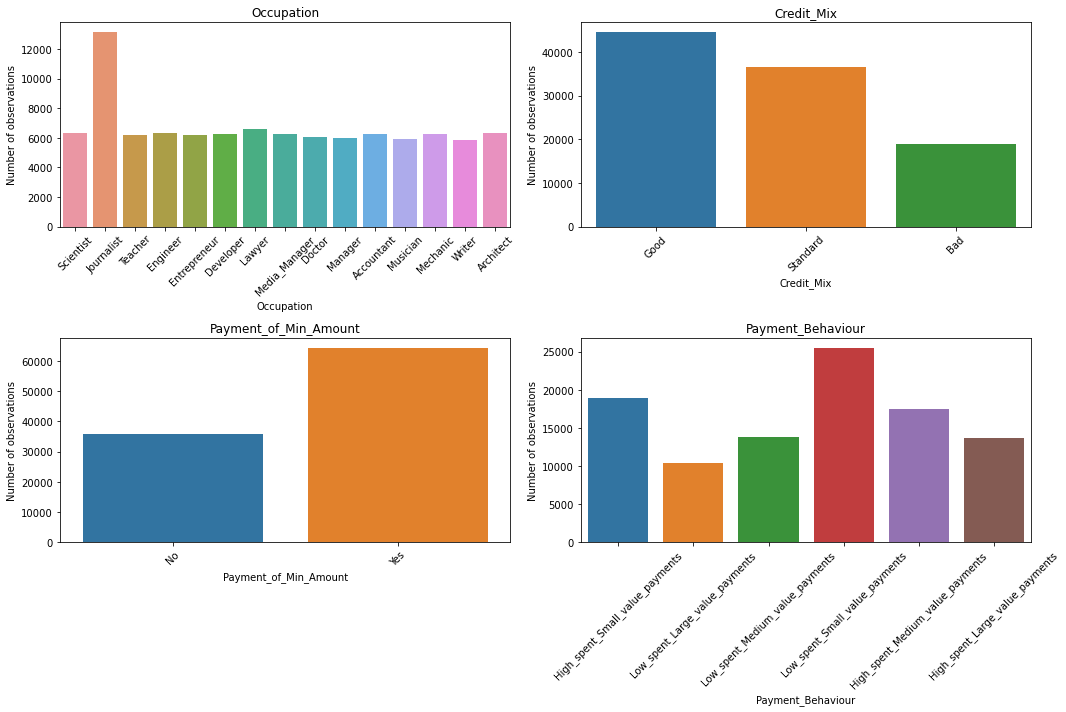

In [39]:
columns_text = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

num_cols = 2 
num_rows = len(columns_text) // num_cols + (len(columns_text) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, column in enumerate(columns_text):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=column, data=explored_data, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

if len(columns_text) < num_rows * num_cols:
    for j in range(len(columns_text), num_rows * num_cols):
        axes.flat[j].set_visible(False)


plt.tight_layout()
plt.show()

comment: Based on the data distribution, a large number of outliers can be observed.

### Data Modelling

In [40]:
data_model = explored_data.copy()

In [41]:
columns_text = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

encoded_data = pd.get_dummies(data_model[columns_text], prefix=columns_text,drop_first=True)

encoded_data

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
99997,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [42]:
data_model = data_model.drop(columns_text, axis=1)
data_model = data_model.join(encoded_data)

In [43]:
data_model.sample(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
67908,17,20357.29,1720.44,3,5,16,2,17,14.0,9.81,...,0,0,0,1,1,1,0,0,0,0
28048,19,61936.00,5018.33,10,8,28,8,47,20.0,17.03,...,0,0,0,0,1,0,0,0,1,0
51138,38,18746.95,1467.25,4,3,3,1,8,12.0,11.32,...,0,0,1,0,0,0,1,0,0,0
52564,42,117019.20,9443.55,2,3,7,4,2,5.0,4.87,...,0,0,1,0,0,0,0,0,0,0
46386,35,69601.24,5908.10,7,7,29,5,27,10.0,16.25,...,0,0,0,1,1,0,1,0,0,0


### Outliers Detection

In [44]:
outlier_data = data_model.copy()

In [45]:
cols_outliers = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

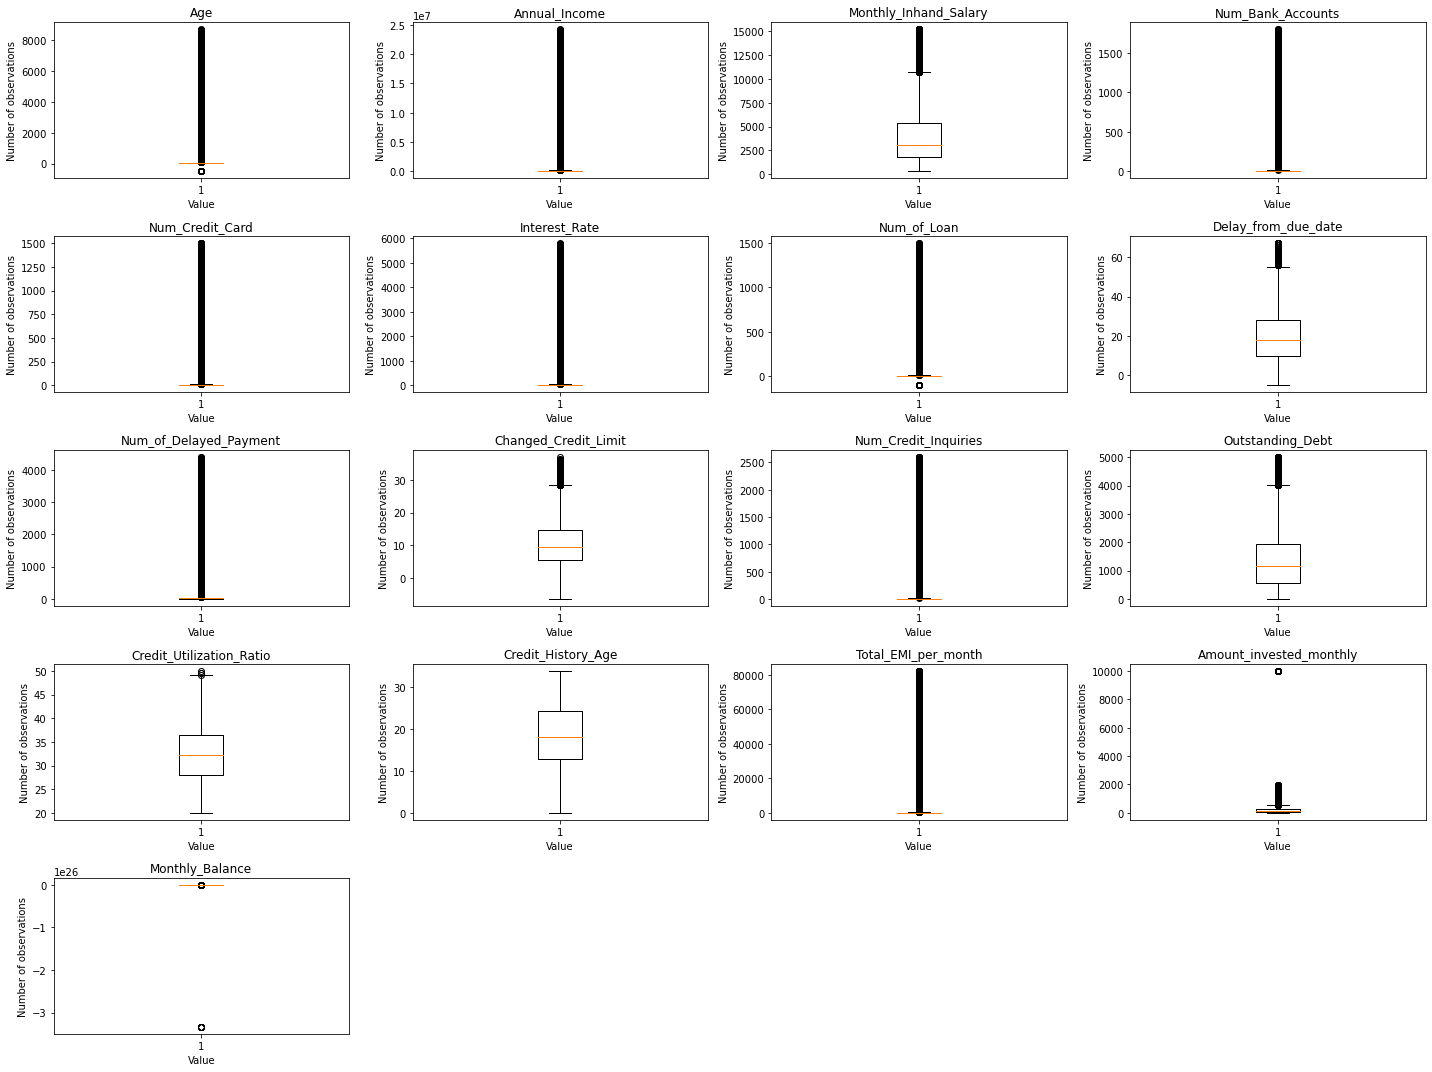

In [46]:
num_cols = 4 
num_rows = len(cols_outliers) // num_cols + (len(cols_outliers) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(cols_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.boxplot(outlier_data[column])
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)

if len(cols_outliers) < num_rows * num_cols:
    for j in range(len(cols_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

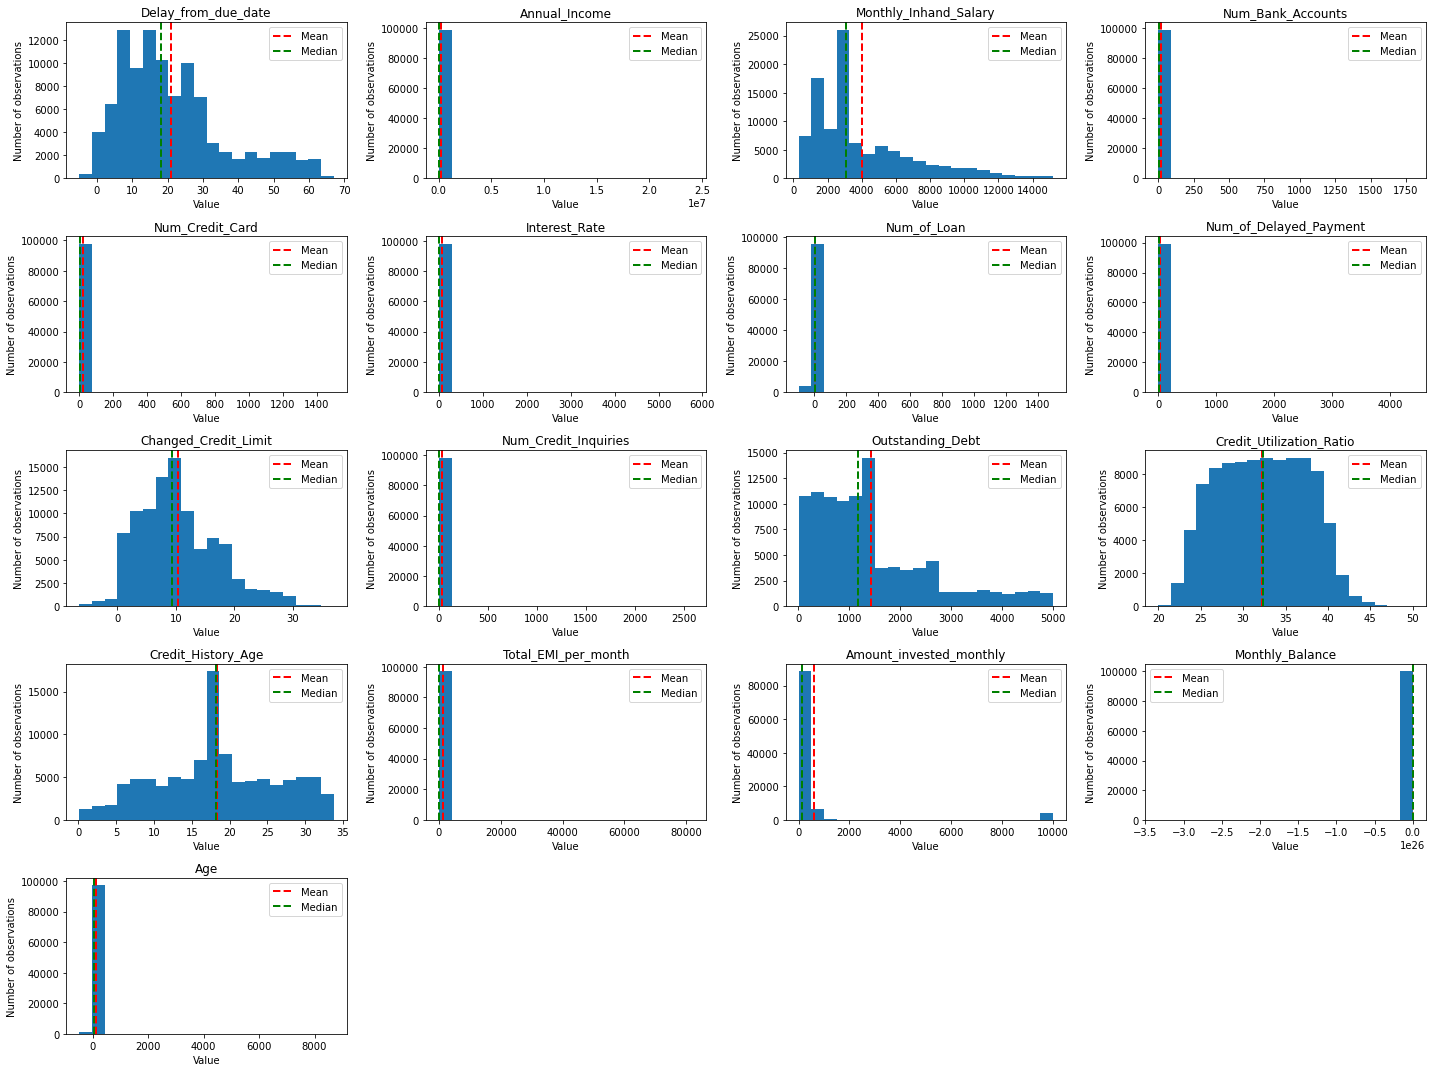

In [47]:
columns_num = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

num_cols = 4 
num_rows = len(columns_num) // num_cols + (len(columns_num) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(columns_num):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(outlier_data[column], bins=20)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
    ax.axvline(outlier_data[column].mean(), color='r', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(outlier_data[column].median(), color='g', linestyle='--', linewidth=2, label='Median')
    ax.legend()

if len(columns_num) < num_rows * num_cols:
    for j in range(len(columns_num), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [48]:
def remove_outliers(data, columns, threshold=1.5):
    
    filtered_data = data.copy()
    
    for column in columns:
        Q1 = filtered_data[column].quantile(0.25)
        Q3 = filtered_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]
    
    return filtered_data

In [49]:
no_outlier_data = remove_outliers(outlier_data, cols_outliers, threshold=2.5)

In [50]:
no_outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72343 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 72343 non-null  int64  
 1   Annual_Income                                       72343 non-null  float64
 2   Monthly_Inhand_Salary                               72343 non-null  float64
 3   Num_Bank_Accounts                                   72343 non-null  int64  
 4   Num_Credit_Card                                     72343 non-null  int64  
 5   Interest_Rate                                       72343 non-null  int64  
 6   Num_of_Loan                                         72343 non-null  int64  
 7   Delay_from_due_date                                 72343 non-null  int64  
 8   Num_of_Delayed_Payment                              72343 non-null  float64


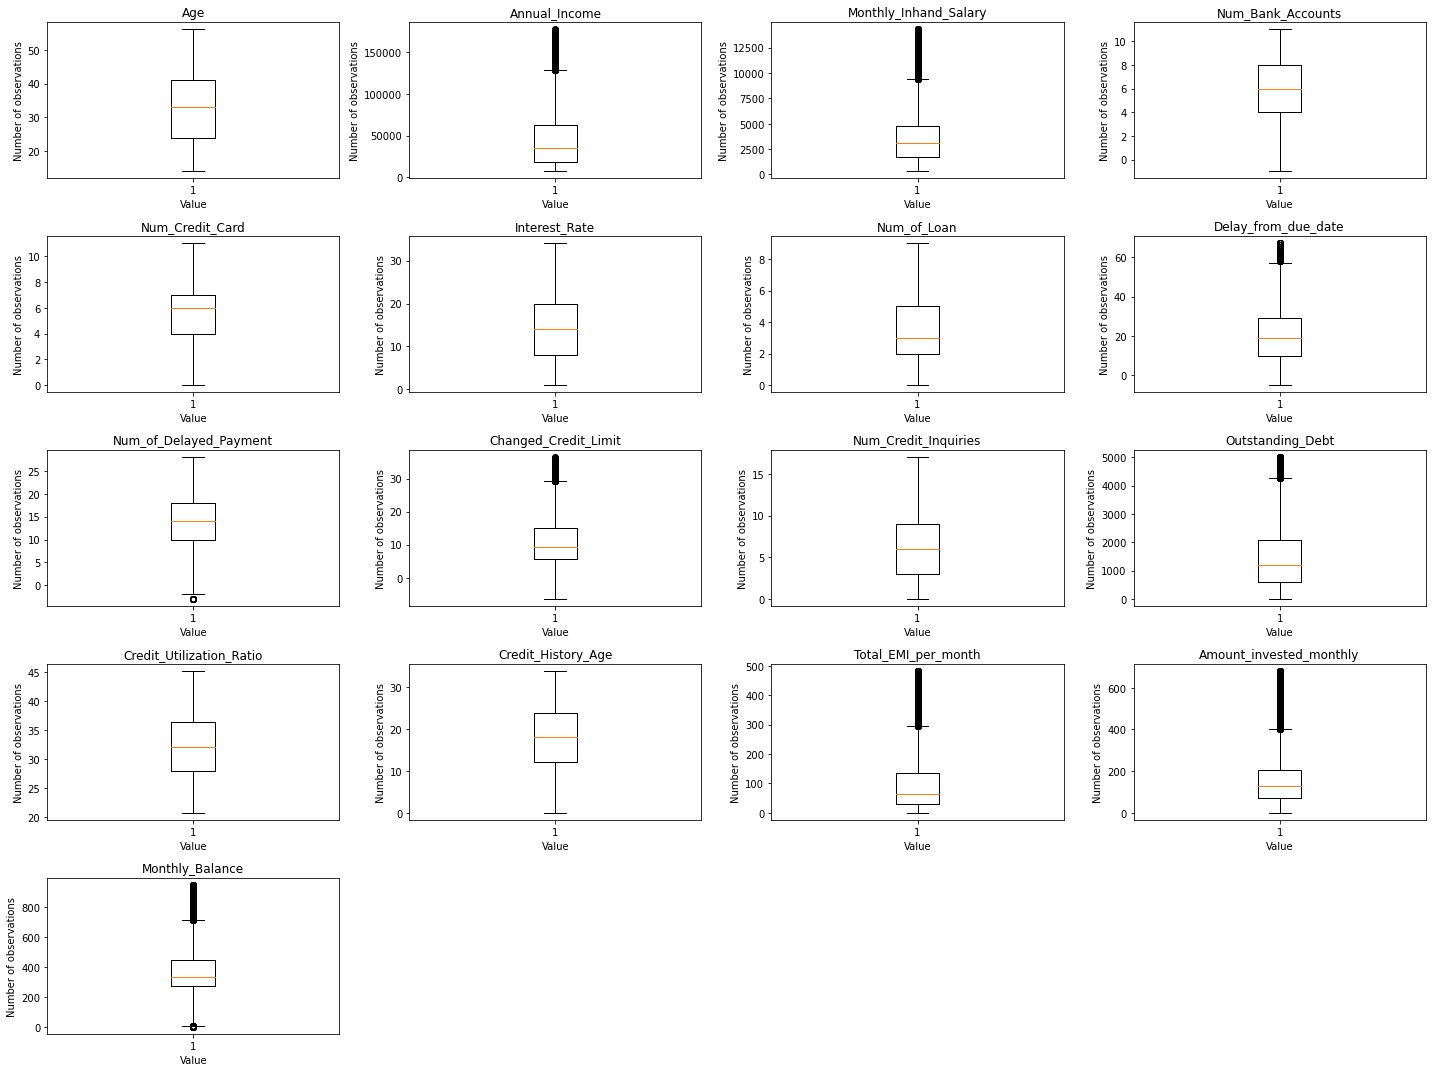

In [51]:
cols_no_outliers = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

num_cols = 4 
num_rows = len(cols_no_outliers) // num_cols + (len(cols_no_outliers) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(cols_no_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.boxplot(no_outlier_data[column])
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)

if len(cols_no_outliers) < num_rows * num_cols:
    for j in range(len(cols_no_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

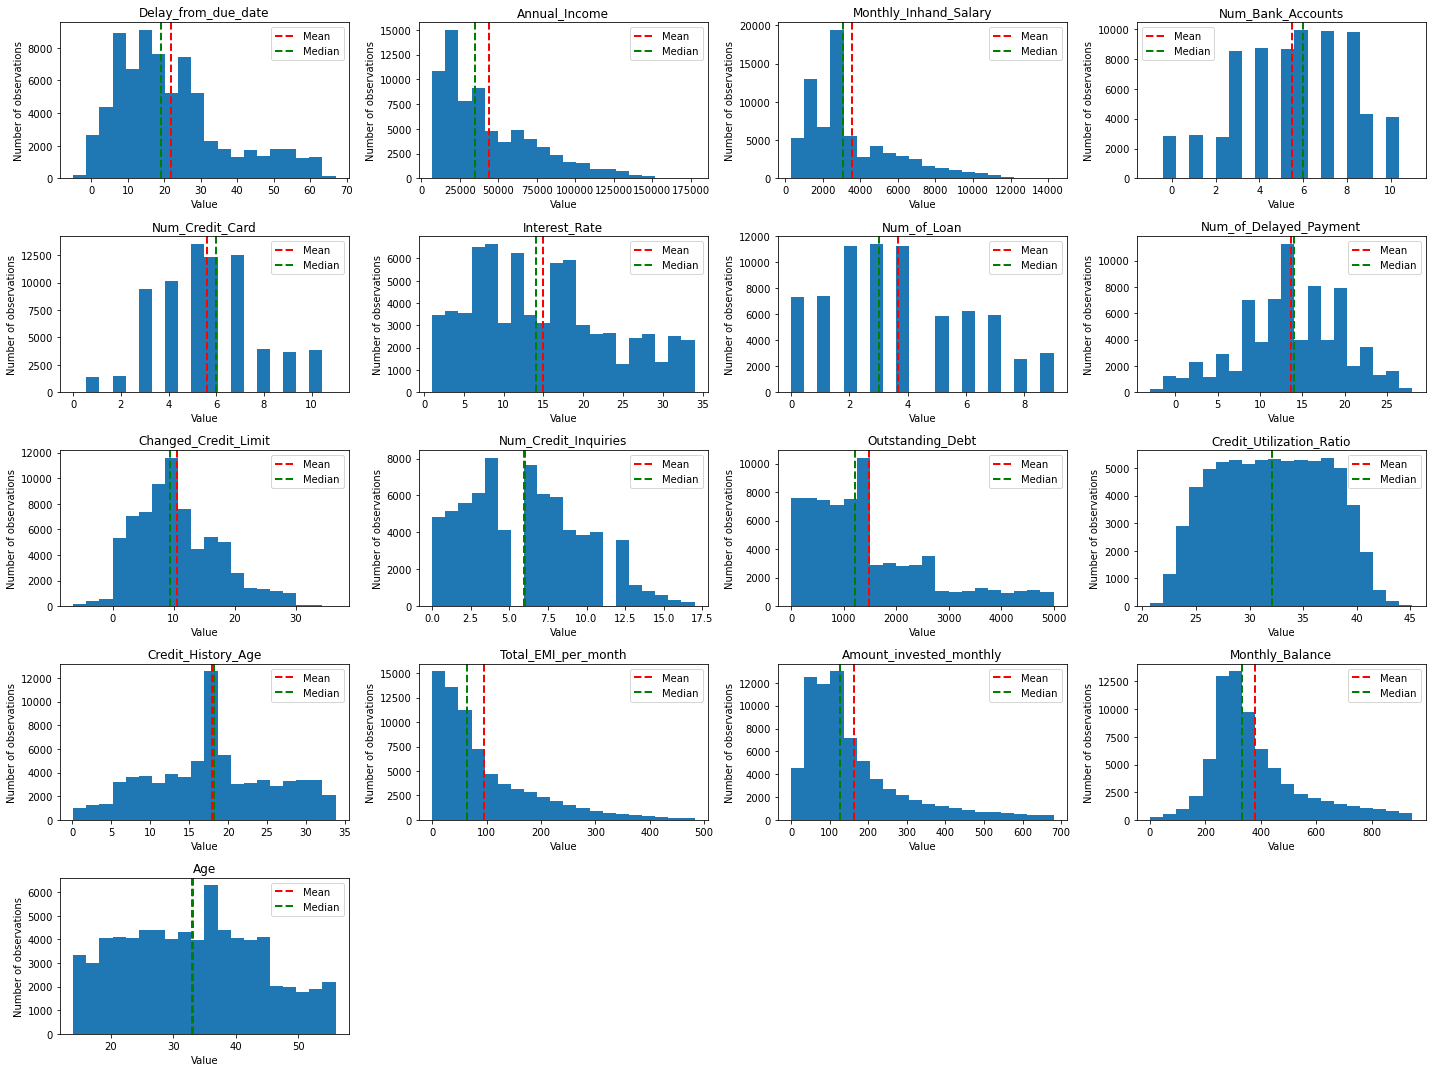

In [52]:
columns_num = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

num_cols = 4 
num_rows = len(columns_num) // num_cols + (len(columns_num) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(columns_num):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(no_outlier_data[column], bins=20)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
    ax.axvline(no_outlier_data[column].mean(), color='r', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(no_outlier_data[column].median(), color='g', linestyle='--', linewidth=2, label='Median')
    ax.legend()
    

if len(columns_num) < num_rows * num_cols:
    for j in range(len(columns_num), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Statistics after outliers removing

In [53]:
summary_table = no_outlier_data[columns_num].describe().T.style.background_gradient(cmap='rainbow')

negative_color = 'red'
def highlight_negative(value):
    color = negative_color if value < 0 else 'white'
    return f'color: {color}'

summary_table = summary_table.applymap(highlight_negative)

summary_table

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,72343.000000,21.761235,15.050051,-5.000000,10.000000,19.000000,29.000000,67.000000
Annual_Income,72343.000000,43963.114291,31253.540671,7005.930000,18630.470000,34512.780000,62571.840000,177350.840000
Monthly_Inhand_Salary,72343.000000,3572.369421,2408.064687,303.650000,1690.470000,3093.750000,4788.780000,14293.500000
Num_Bank_Accounts,72343.000000,5.509213,2.562486,-1.000000,4.000000,6.000000,8.000000,11.000000
Num_Credit_Card,72343.000000,5.614710,2.071220,0.000000,4.000000,6.000000,7.000000,11.000000
Interest_Rate,72343.000000,15.002101,8.794676,1.000000,8.000000,14.000000,20.000000,34.000000
Num_of_Loan,72343.000000,3.662704,2.444430,0.000000,2.000000,3.000000,5.000000,9.000000
Num_of_Delayed_Payment,72343.000000,13.680923,6.002480,-3.000000,10.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,72343.000000,10.587895,6.798067,-6.450000,5.610000,9.410000,15.100000,36.490000
Num_Credit_Inquiries,72343.000000,5.970018,3.835263,0.000000,3.000000,6.000000,9.000000,17.000000


comments: comparing the statistics before and after removing the outliers, you can see that the two variables "Num_of_Delayed_Payment, Num_Bank_Accounts", "Delay_from_due_date" take negative values that need to be removed from the data because the number of late payments (Num_of_Delayed_Payment) cannot be negative because you cannot have a negative number of delays. Similarly, the number of bank accounts (Num_Bank_Accounts) cannot be negative because you cannot have a negative number of accounts.

In [54]:
def remove_negative_values(data, columns):
    for column in columns:
        data = data[data[column] >= 0]
    return data

In [55]:
negative_values = ['Num_of_Delayed_Payment', 'Num_Bank_Accounts', 'Delay_from_due_date']

clean_data = remove_negative_values(no_outlier_data, negative_values)

In [56]:
summary_table_2 = clean_data[columns_num].describe().T.style.background_gradient(cmap='rainbow')

negative_color = 'red'
def highlight_negative(value):
    color = negative_color if value < 0 else 'white'
    return f'color: {color}'

summary_table_2 = summary_table_2.applymap(highlight_negative)

summary_table_2

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,71541.000000,21.963182,14.992836,0.000000,11.000000,19.000000,29.000000,67.000000
Annual_Income,71541.000000,43833.472034,31155.635865,7005.930000,18572.010000,34447.490000,62380.110000,177350.840000
Monthly_Inhand_Salary,71541.000000,3563.028528,2399.766076,303.650000,1685.730000,3093.750000,4780.870000,14293.500000
Num_Bank_Accounts,71541.000000,5.542752,2.550470,0.000000,4.000000,6.000000,8.000000,11.000000
Num_Credit_Card,71541.000000,5.631204,2.068216,0.000000,4.000000,6.000000,7.000000,11.000000
Interest_Rate,71541.000000,15.096770,8.790335,1.000000,8.000000,14.000000,20.000000,34.000000
Num_of_Loan,71541.000000,3.681581,2.446956,0.000000,2.000000,3.000000,5.000000,9.000000
Num_of_Delayed_Payment,71541.000000,13.807928,5.888437,0.000000,10.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,71541.000000,10.635246,6.809137,-6.450000,5.650000,9.460000,15.190000,36.490000
Num_Credit_Inquiries,71541.000000,6.004165,3.836727,0.000000,3.000000,6.000000,9.000000,17.000000


### Data Standarization

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
standarized_data = clean_data.copy()

In [59]:
scaled_cols = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

In [60]:
scaler = StandardScaler()
standarized_data[scaled_cols] = scaler.fit_transform(standarized_data[scaled_cols])

In [61]:
standarized_data.sample(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
84730,-0.474633,-0.948154,-1.110915,0.963456,-0.305195,-0.579819,0.538803,-0.064243,-0.307032,1.278402,...,0,0,0,1,1,0,0,0,1,0
98575,-0.754155,2.570420,2.822504,-0.996981,0.178317,-0.807343,-0.687218,-1.331524,-2.005288,-0.332680,...,0,0,1,0,0,0,0,0,0,0
41724,0.457106,0.760646,-0.195553,1.747630,1.145341,1.809185,1.764825,1.002941,1.561049,0.829003,...,0,0,0,0,1,1,0,0,0,0
75446,0.922975,-0.774258,-0.863602,-1.781155,-0.788707,-0.466057,-1.095892,-1.131427,-0.307032,-0.206378,...,0,0,1,0,0,0,0,0,1,0
72643,0.177584,0.670449,0.652752,-0.996981,0.178317,-1.148630,-1.095892,-0.264340,0.032619,-0.071264,...,0,0,0,1,1,0,0,0,0,0


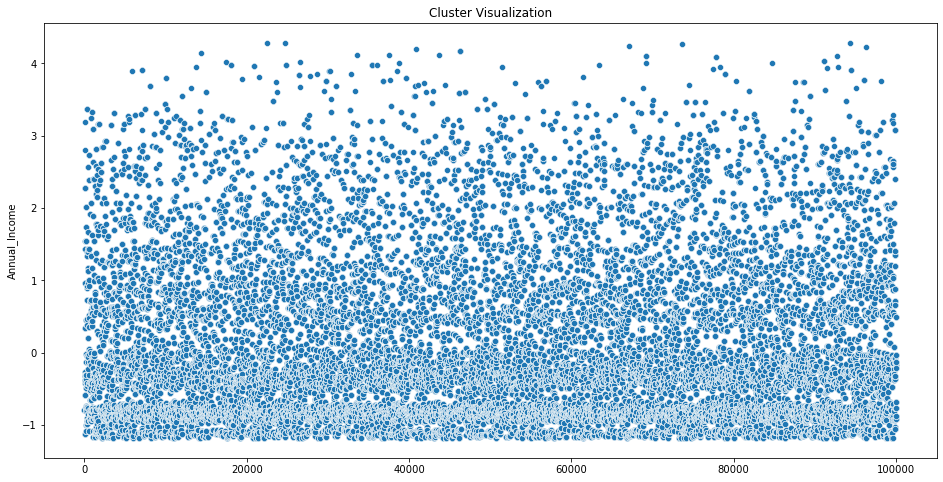

In [62]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=standarized_data.reset_index(), x=standarized_data.index, y='Annual_Income')
plt.title('Cluster Visualization')
plt.show()


### KMeans implementation

In [63]:
from sklearn.cluster import KMeans

In [64]:

data_annual_income = standarized_data[['Annual_Income']].copy()
data_annual_income.head()

,Annual_Income
0,-0.793421
3,-0.793421
4,-0.793421
5,-0.793421
6,-0.793421


In [65]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=1000)
    kmeans.fit(data_annual_income)
    wcss.append(kmeans.inertia_)

wcss = pd.DataFrame(data=np.c_[range(1, 10), wcss], columns=['NumberOfClusters', 'WCSS'])
wcss  

,NumberOfClusters,WCSS
0,1.0,71541.000000
1,2.0,19648.933535
2,3.0,9940.762006
3,4.0,5263.523853
4,5.0,3285.123519
5,6.0,2429.159322
6,7.0,1872.034943
7,8.0,1492.595887
8,9.0,1152.725783


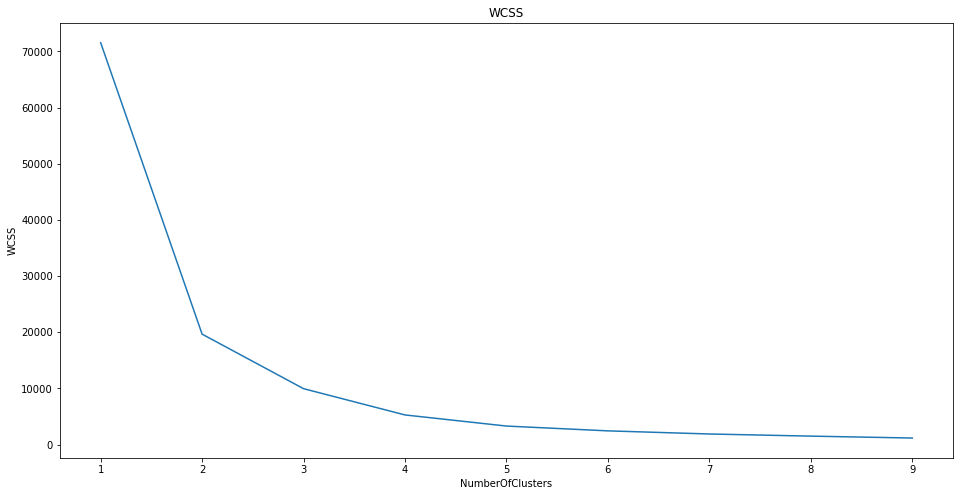

In [71]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=wcss, x='NumberOfClusters', y='WCSS')
plt.title('WCSS')
plt.show()

In [67]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

kmeans.fit(data_annual_income)


standarized_data['Cluster'] = kmeans.labels_

standarized_data.sample(5)



,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Cluster
47075,-1.592720,-0.749768,-0.195553,0.571369,0.661829,1.922947,1.356151,1.002941,2.070525,-0.154976,...,0,0,0,1,0,0,0,0,1,1
85646,1.575192,-0.940221,-0.951482,-1.389068,-0.788707,-1.376154,-0.687218,-1.064728,-0.986335,-0.107980,...,0,1,0,0,0,0,0,0,1,1
17483,-1.499546,0.979379,1.071575,0.571369,2.112364,1.126612,1.764825,2.670415,0.711921,-0.604375,...,0,0,0,1,1,0,0,0,0,0
68936,-1.220024,-0.117656,-0.012797,0.571369,-0.305195,-1.148630,-1.095892,-0.931330,0.711921,0.140218,...,0,0,1,1,1,0,0,0,0,1
186,-0.195112,-1.002491,-1.158866,-0.212806,-0.305195,-0.579819,-0.278544,0.202553,0.372270,0.757040,...,0,0,1,1,0,0,0,0,1,1


In [68]:
standarized_data['Cluster'] = standarized_data['Cluster'].astype(str)
standarized_data.sample(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Cluster
19361,-1.220024,-0.294990,-0.159233,-0.996981,-0.305195,-0.921106,-0.278544,-0.864631,0.032619,0.030071,...,0,1,0,1,0,0,0,0,1,1
4821,-1.220024,-0.799594,-0.195553,0.179281,1.628852,1.581661,0.947477,0.469349,0.202444,2.506173,...,0,0,0,1,0,1,0,0,0,1
92987,-0.567807,1.551984,1.635234,-1.781155,-1.755730,-0.352295,0.130129,-1.398223,-2.344939,-0.131478,...,0,1,0,0,0,1,0,0,0,2
938,-0.101938,-0.771550,-0.791915,0.571369,2.112364,2.150471,1.764825,-0.464437,1.221397,1.785078,...,0,0,0,1,1,0,0,0,0,1
84325,0.177584,-0.753285,-0.807159,0.179281,1.145341,1.922947,-0.278544,0.069155,-0.476858,-0.049235,...,0,0,1,1,0,0,0,0,1,1


In [69]:
kmeans.cluster_centers_

array([[ 0.63936721],
       [-0.65627732],
       [ 2.07559599]])

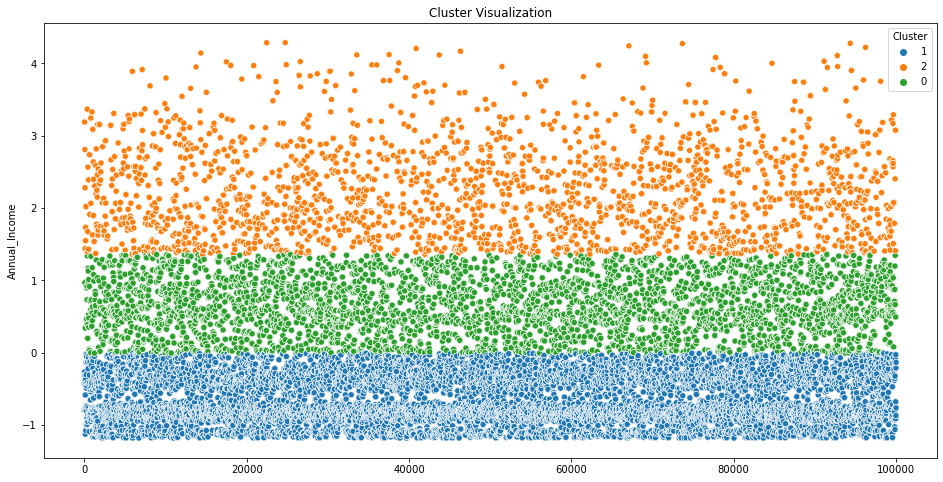

In [70]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=standarized_data.reset_index(), x=standarized_data.index, y='Annual_Income', hue='Cluster')
plt.title('Cluster Visualization')
plt.show()
